In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 1. 数据加载与预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 转为张量 [0,1]
    transforms.Normalize((0.1307,), (0.3801,))  # 标准化 均值0.1307 方差0.3081
])

# 加载 MNIST 数据集
train_dataset = datasets.MNIST(root='./', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)




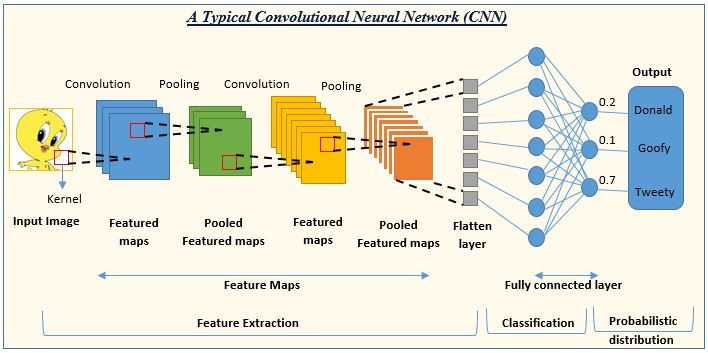     
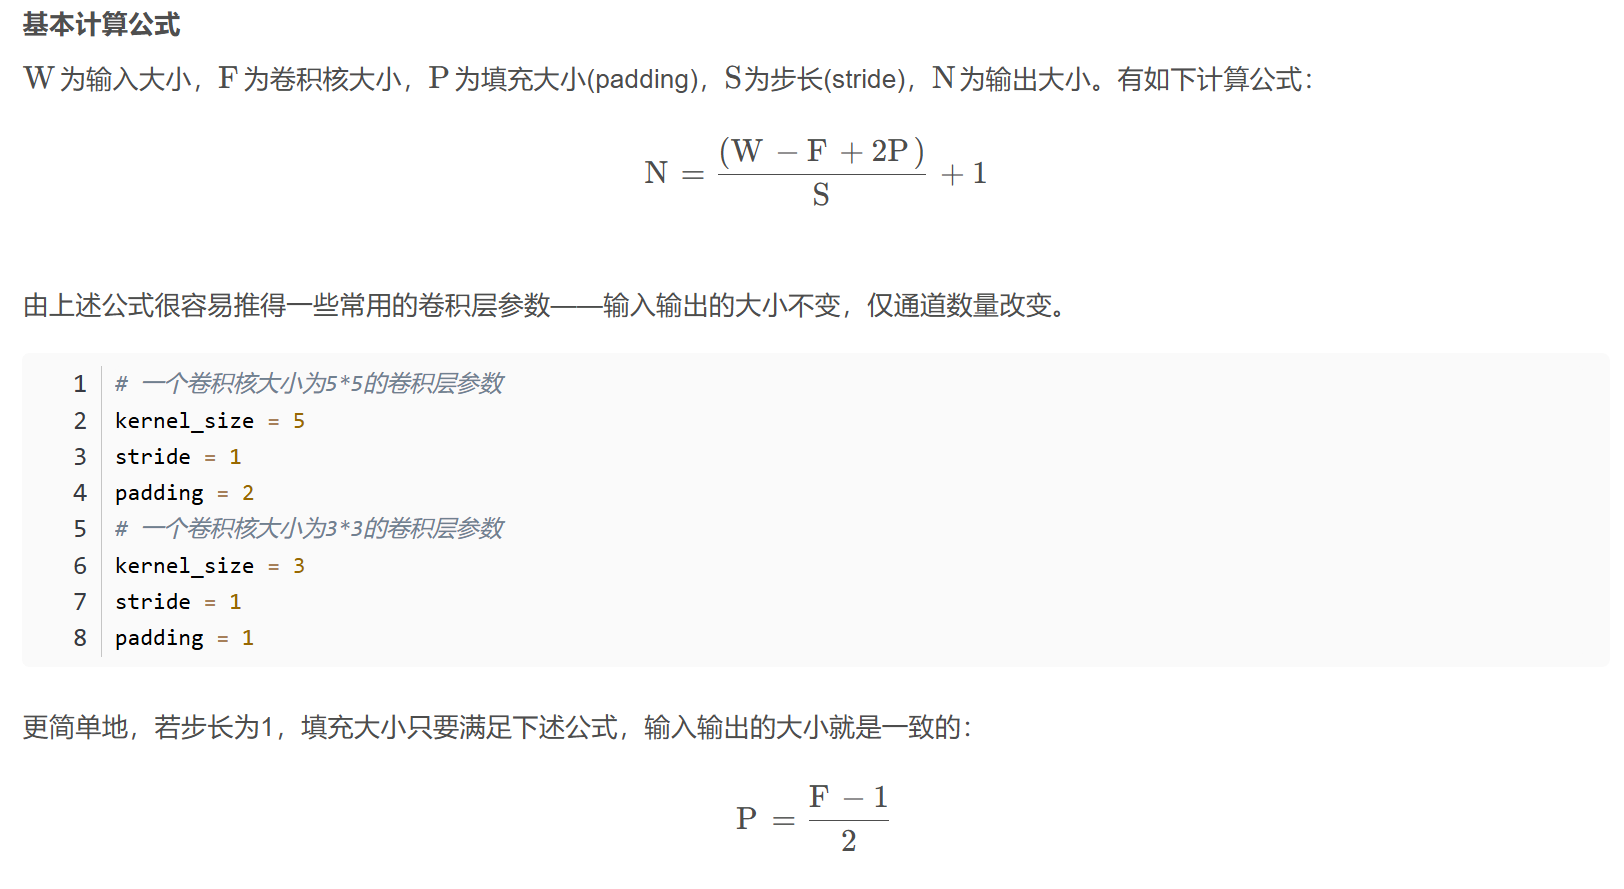   

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 定义卷积层
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # 32 × 28 × 28
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # 64 × 28 × 28
        # 定义全连接层
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # 展平后输入到全连接层
        self.fc2 = nn.Linear(128, 10)  # 10 个类别

    def forward(self, x):
        # 第一层卷积 ＋ ReLU 激活函数
        x = F.relu(self.conv1(x))
        # 最大池化 32 × 14 × 14
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        # 第二层卷积 ＋ ReLU 激活函数
        x = F.relu(self.conv2(x))
        # 最大池化 64 × 7 × 7
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        # 展平
        x = x.view(x.size(0), -1)
        # 全连接层 ＋ ReLU 激活函数
        x = F.relu(self.fc1(x))         
        # 输出层
        x = self.fc2(x)
        return x
    
# 实例化模型
model = CNN()
# 如果可用的话使用 GPU 进行训练，否则使用 CPU 进行训练。
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 将神经网络模型 net 移动到指定的设备上。
model = model.to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# 训练模型
epochs = 5
# 训练模式
model.train()
# 迭代训练
for epoch in range(epochs):
    loss_total = 0.0
    for images,labels in train_loader:
        # 将数据移入设备
        images = images.to(device)
        labels = labels.to(device)
        # 前向传播
        outputs = model(images)
        # 计算损失
        loss = criterion(outputs, labels)
        # 清空梯度
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 更新参数
        optimizer.step()
        # 累计损失
        loss_total += loss.item()

    # 打印损失
    print(f"Epochs: [{epoch + 1} / {epochs}],loss: {loss_total / len(train_loader)}")

# 测试模型
# 验证模式
model.eval()
correct = 0
total = 0
# 关闭梯度计算
with torch.no_grad():
    for images,labels in test_loader:
        # 将数据移入设备
        images = images.to(device)
        labels = labels.to(device)
        # 前向传播
        outputs = model(images)
        # 预测类别
        _, predicted = torch.max(outputs.data, 1)
        # 统计正确个数
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy : {accuracy}%")
